**Understanding industry classifications**

1. we must first understand what industry classification is best to use and the nuances between each one.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set paths here C:\Users\clint\Desktop\compstak-ra\src\exploration_1.ipynb
#C:\Users\clint\Desktop\compstak-ra\data\data\university-of-british-columbia-leases-2025-04-02.csv
#C:\Users\clint\Desktop\compstak-ra\data\data\university-of-british-columbia-sales-2025-04-02.csv
#C:\Users\clint\Desktop\compstak-ra\data\data\cb_2018_us_state_5m\cb_2018_us_state_5m.shp
path = 'C:/Users/clint/Desktop/data/data/'
# Update the shapefile path to the correct location
shapefile_path = 'C:/Users/clint/Desktop/data/data/cb_2018_us_state_5m/cb_2018_us_state_5m.shp'

# Load the data
sales = pd.read_csv(path + 'university-of-british-columbia-sales-2025-04-02.csv')
leases = pd.read_csv(path + 'university-of-british-columbia-leases-2025-04-02.csv')

C:\Users\clint\AppData\Local\Temp\ipykernel_22796\1621790509.py:14: DtypeWarning: Columns (8,52,73,77) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv(path + 'university-of-british-columbia-sales-2025-04-02.csv')
C:\Users\clint\AppData\Local\Temp\ipykernel_22796\1621790509.py:15: DtypeWarning: Columns (15,35,37,59,61,67,71,73,76,77,78,80,82,85) have mixed types. Specify dtype option on import or set low_memory=False.
  leases = pd.read_csv(path + 'university-of-british-columbia-leases-2025-04-02.csv')
C:\Users\clint\AppData\Local\Temp\ipykernel_22796\1621790509.py:15: DtypeWarning: Columns (15,35,37,59,61,67,71,73,76,77,78,80,82,85) have mixed types. Specify dtype option on import or set low_memory=False.
  leases = pd.read_csv(path + 'university-of-british-columbia-leases-2025-04-02.csv')


# Investigating Property ID and State Consistency
We will analyze whether a `Property Id` always corresponds to the same `State` in both the sales and leases datasets.

In [10]:
# Check if Property Id always corresponds to the same State in sales data
sales_property_state_consistency = sales.groupby('Property Id')['State'].nunique()
sales_inconsistent_properties = sales_property_state_consistency[sales_property_state_consistency > 1]
if sales_inconsistent_properties.empty:
    print('All Property Ids in sales data are consistent with a single State.')
else:
    print('Inconsistent Property Ids in sales data found:', sales_inconsistent_properties)

# Check if Property Id always corresponds to the same State in leases data
leases_property_state_consistency = leases.groupby('Property Id')['State'].nunique()
leases_inconsistent_properties = leases_property_state_consistency[leases_property_state_consistency > 1]
if leases_inconsistent_properties.empty:
    print('All Property Ids in leases data are consistent with a single State.')
else:
    print('Inconsistent Property Ids in leases data found:', leases_inconsistent_properties)

All Property Ids in sales data are consistent with a single State.
All Property Ids in leases data are consistent with a single State.


In [11]:
# Combine sales and leases data
sales['Source'] = 'Sales'
leases['Source'] = 'Leases'
combined_data_raw = pd.concat([sales, leases], ignore_index=True)

# Check for duplicate Property Ids
print(f"Total rows in combined dataset: {len(combined_data_raw)}")
print(f"Number of unique Property Ids: {combined_data_raw['Property Id'].nunique()}")
print(f"Number of duplicate Property Ids: {len(combined_data_raw) - combined_data_raw['Property Id'].nunique()}")

# Simple and fast deduplication - keep first occurrence of each Property Id
combined_data = combined_data_raw.drop_duplicates(subset=['Property Id'])

# Verify we now have only unique Property Ids
print(f"\nAfter deduplication:")
print(f"Total rows in deduplicated dataset: {len(combined_data)}")
print(f"Number of unique Property Ids: {combined_data['Property Id'].nunique()}")

# Now analyze the property types and subtypes with unique properties
print(f"\nProperty Type distribution after deduplication:")
print(combined_data['Property Type'].value_counts())
print(f"\nProperty Subtype distribution after deduplication (top 10):")
print(combined_data['Property Subtype'].value_counts().head(10))

# Count unique property IDs by Property Type
property_type_unique_counts = combined_data.groupby('Property Type')['Property Id'].nunique()
print(f"\nUnique Property IDs by Property Type:")
print(property_type_unique_counts)

# Count unique property IDs by Property Subtype (top 10)
property_subtype_unique_counts = combined_data.groupby('Property Subtype')['Property Id'].nunique()
print(f"\nUnique Property IDs by Property Subtype (top 10):")
print(property_subtype_unique_counts.sort_values(ascending=False).head(10))

Total rows in combined dataset: 1732650
Number of unique Property Ids: 759623
Number of duplicate Property Ids: 973027

After deduplication:
Total rows in deduplicated dataset: 759623
Number of unique Property Ids: 759623

Property Type distribution after deduplication:
Property Type
Retail          240241
Industrial      188235
Office          141586
Multi-Family     84087
Land             49989
Other             9789
Hotel             4969
Mixed-Use         3705
Name: count, dtype: int64

Property Subtype distribution after deduplication (top 10):
Property Subtype
Apartments                    90575
Warehouse/Distribution        81313
General Retail                42936
Flex/R&D                      34246
Mixed-Use                     30929
Medical/Healthcare            30770
Restaurant/Bar                25652
Vacant Land                   25063
Super-Regional Center/Mall    19310
Automotive                    14743
Name: count, dtype: int64

After deduplication:
Total rows in dedup

# Property Type and Subtype Analysis (Using Unique Properties)

Now that we have deduplicated the dataset to ensure each property is counted only once, let's analyze the coverage and distribution by Property Type and Property Subtype.

In [12]:
# First, let's explore what Property Types and Subtypes are available in our data
print('Property Types in sales data:')
print(sales['Property Type'].value_counts())
print('\nProperty Subtypes in sales data:')
print(sales['Property Subtype'].value_counts().head(10))  # Show top 10 subtypes

print('\nProperty Types in leases data:')
print(leases['Property Type'].value_counts())
print('\nProperty Subtypes in leases data:')
print(leases['Property Subtype'].value_counts().head(10))  # Show top 10 subtypes

Property Types in sales data:
Property Type
Retail          173102
Industrial      112989
Multi-Family     92561
Office           88399
Land             50548
Other             8907
Hotel             5500
Mixed-Use         3028
Name: count, dtype: int64

Property Subtypes in sales data:
Property Subtype
Apartments                96603
Warehouse/Distribution    48725
General Retail            27493
Vacant Land               22973
Flex/R&D                  22733
Medical/Healthcare        22585
Mixed-Use                 21812
Restaurant/Bar            21720
Automotive                13323
Condominium               10213
Name: count, dtype: int64

Property Types in leases data:
Property Type
Office          659897
Industrial      296444
Retail          172828
Multi-Family     15391
Mixed-Use         6636
Land              3037
Other             2118
Hotel              643
Name: count, dtype: int64

Property Subtypes in leases data:
Property Subtype
Medical/Healthcare              139366
Wa

In [13]:
# Calculate coverage metrics by Property Type using unique properties
# Get counts by Property Type for CompStak data - using nunique to ensure we count unique properties
compstak_type_counts = combined_data_raw.groupby('Property Type')['Property Id'].nunique().reset_index()
compstak_type_counts.columns = ['Property Type', 'CompStak_Properties']

# Internet data on estimated U.S. commercial buildings by type with updated figures
internet_data = {
    'Retail': 1070000,       # 1.07 million brick-and-mortar retail establishments as of 2023
    'Industrial': 350000,     # Includes warehouses, manufacturing facilities, etc.
    'Office': 569311,         # Includes Class A, B, and C office buildings as of 2018
    'Multi-Family': 5200000,  # Includes duplexes, triplexes, and apartment buildings
    'Hotel': 116873,         # Number of hotels and motels as of 2025
    'Mixed-Use': 580000,     # Buildings combining residential with commercial use (apartments within)
    'Land': 13100000,        # Total commercial land parcels across all U.S. states
    'Other': None,            # Includes education, medical, religious facilities (included in total)
}

# Create DataFrame for property type coverage using the internet data
type_coverage_df = pd.DataFrame({
    'Property Type': list(internet_data.keys()),
    'Total_Properties': list(internet_data.values())
})

# Filter out None values for Total_Properties
type_coverage_df = type_coverage_df[type_coverage_df['Total_Properties'].notna()]

# Merge with CompStak counts - use left join to include all internet data categories
type_coverage_df = type_coverage_df.merge(compstak_type_counts, on='Property Type', how='left')

# Fill NaN values with 0 for CompStak properties where no match was found
type_coverage_df['CompStak_Properties'] = type_coverage_df['CompStak_Properties'].fillna(0)

# Calculate coverage percentage
type_coverage_df['Coverage_Percent'] = (type_coverage_df['CompStak_Properties'] / 
                                      type_coverage_df['Total_Properties']) * 100

# Display the coverage by property type
type_coverage_df.sort_values('Coverage_Percent', ascending=False)

,Property Type,Total_Properties,CompStak_Properties,Coverage_Percent
1,Industrial,350000.0,188239,53.782571
2,Office,569311.0,141594,24.871116
0,Retail,1070000.0,240247,22.452991
4,Hotel,116873.0,4969,4.251624
3,Multi-Family,5200000.0,84092,1.617154
5,Mixed-Use,580000.0,3707,0.639138
6,Land,13100000.0,49992,0.381618


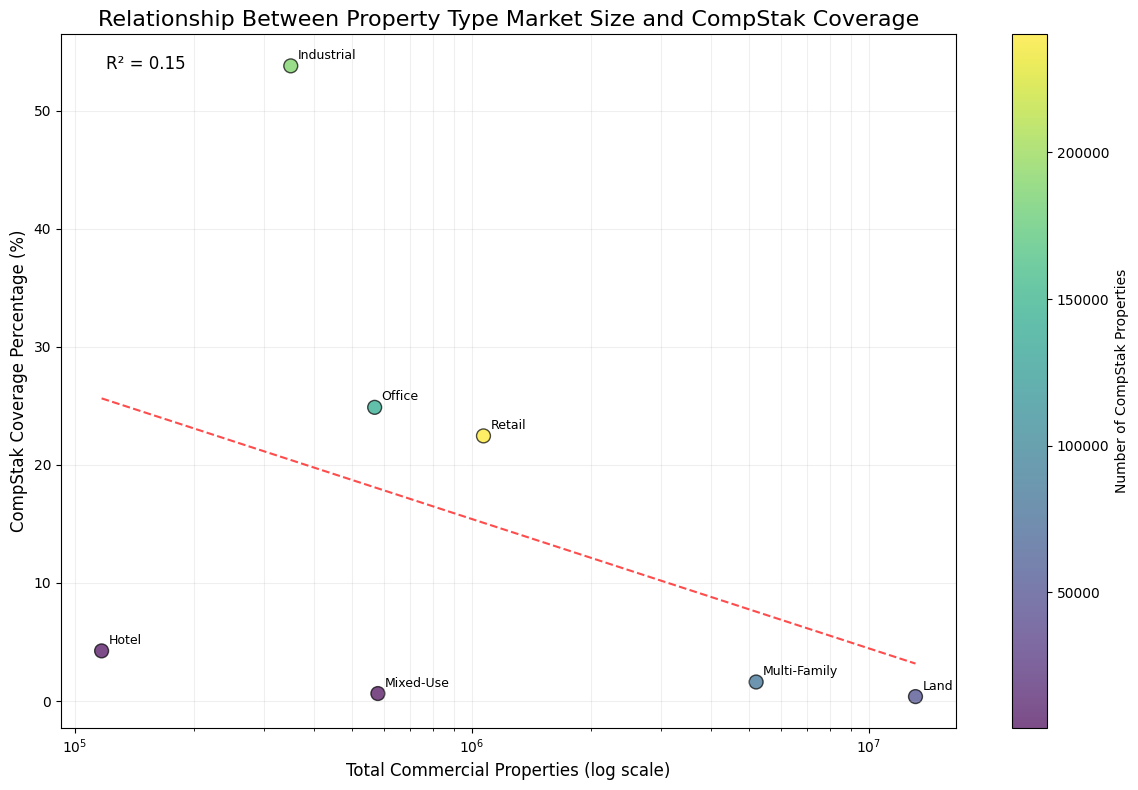

In [14]:
# Create a scatter plot to analyze coverage by Property Type
plt.figure(figsize=(12, 8))

# Add log scale for better visualization
plt.scatter(type_coverage_df['Total_Properties'], 
           type_coverage_df['Coverage_Percent'], 
           s=100, alpha=0.7, c=type_coverage_df['CompStak_Properties'], 
           cmap='viridis', edgecolor='black')

plt.xscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add property type labels
for i, row in type_coverage_df.iterrows():
    plt.annotate(row['Property Type'], 
                (row['Total_Properties'], row['Coverage_Percent']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=9)

plt.colorbar(label='Number of CompStak Properties')
plt.title('Relationship Between Property Type Market Size and CompStak Coverage', fontsize=16)
plt.xlabel('Total Commercial Properties (log scale)', fontsize=12)
plt.ylabel('CompStak Coverage Percentage (%)', fontsize=12)

# Add a trend line to see if there's a relationship
from scipy import stats
# Filter out zeros for trend line calculation
non_zero_df = type_coverage_df[type_coverage_df['Coverage_Percent'] > 0]
if len(non_zero_df) > 1:  # Need at least 2 points for regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(non_zero_df['Total_Properties']), 
                                                                  non_zero_df['Coverage_Percent'])
    x = np.array([min(non_zero_df['Total_Properties']), max(non_zero_df['Total_Properties'])])
    y = intercept + slope * np.log10(x)
    plt.plot(x, y, 'r--', alpha=0.7)
    
    # Add annotation with R² value
    plt.annotate(f"R² = {r_value**2:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.savefig('C:/Users/clint/Desktop/compstak-ra/Images/plots/property_type_coverage.png', dpi=300, bbox_inches='tight')
plt.show()

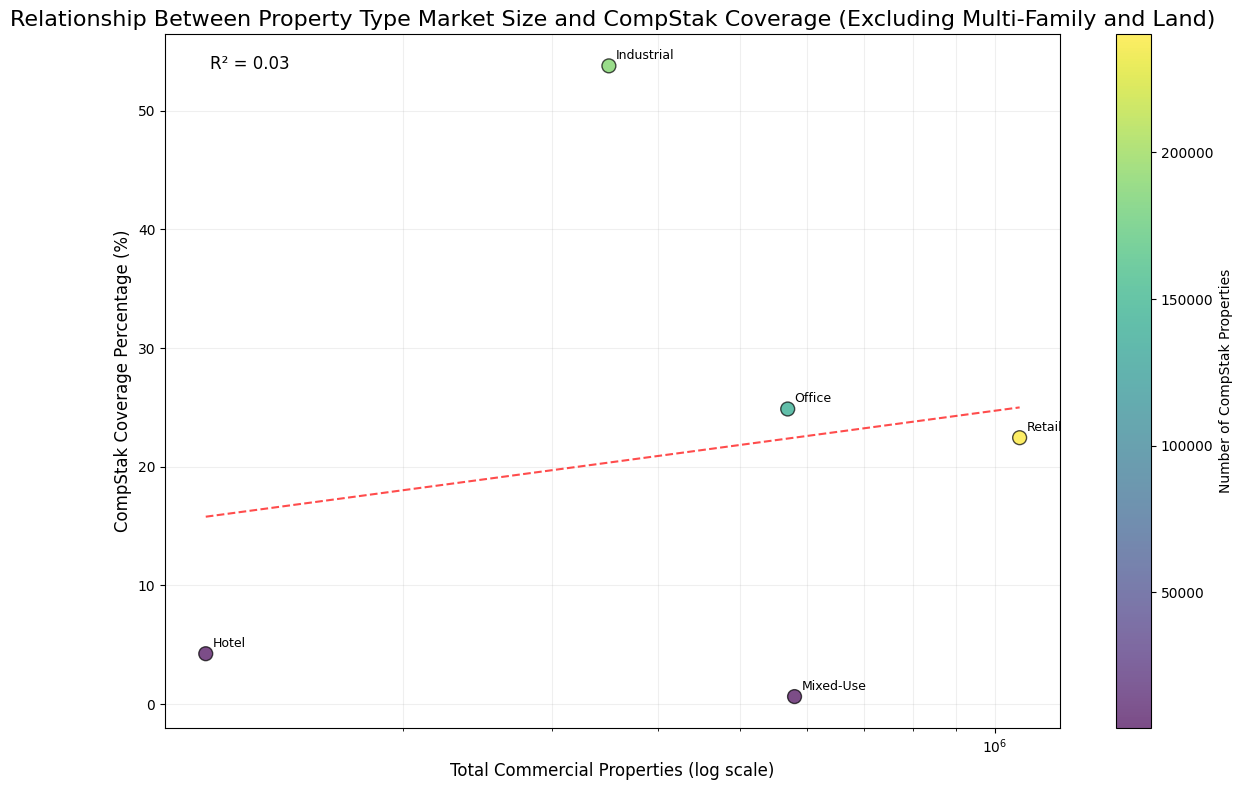

In [15]:
# Filter out 'Multi-Family' and 'Land' from the dataset
type_coverage_filtered_df = type_coverage_df[~type_coverage_df['Property Type'].isin(['Multi-Family', 'Land'])]

# Create a scatter plot to analyze coverage by Property Type (excluding 'Multi-Family' and 'Land')
plt.figure(figsize=(12, 8))

# Add log scale for better visualization
plt.scatter(type_coverage_filtered_df['Total_Properties'], 
            type_coverage_filtered_df['Coverage_Percent'], 
            s=100, alpha=0.7, c=type_coverage_filtered_df['CompStak_Properties'], 
            cmap='viridis', edgecolor='black')

plt.xscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add property type labels
for i, row in type_coverage_filtered_df.iterrows():
    plt.annotate(row['Property Type'], 
                (row['Total_Properties'], row['Coverage_Percent']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=9)

plt.colorbar(label='Number of CompStak Properties')
plt.title('Relationship Between Property Type Market Size and CompStak Coverage (Excluding Multi-Family and Land)', fontsize=16)
plt.xlabel('Total Commercial Properties (log scale)', fontsize=12)
plt.ylabel('CompStak Coverage Percentage (%)', fontsize=12)

# Add a trend line to see if there's a relationship
from scipy import stats
# Filter out zeros for trend line calculation
non_zero_filtered_df = type_coverage_filtered_df[type_coverage_filtered_df['Coverage_Percent'] > 0]
if len(non_zero_filtered_df) > 1:  # Need at least 2 points for regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(non_zero_filtered_df['Total_Properties']), 
                                                                  non_zero_filtered_df['Coverage_Percent'])
    x = np.array([min(non_zero_filtered_df['Total_Properties']), max(non_zero_filtered_df['Total_Properties'])])
    y = intercept + slope * np.log10(x)
    plt.plot(x, y, 'r--', alpha=0.7)
    
    # Add annotation with R² value
    plt.annotate(f"R² = {r_value**2:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.savefig('C:/Users/clint/Desktop/compstak-ra/Images/plots/property_type_coverage_filtered.png', dpi=300, bbox_inches='tight')
plt.show()

# Property Subtype Analysis (Using Unique Properties)

Now let's perform a similar analysis for Property Subtypes, ensuring we're using our deduplicated dataset with unique properties.

In [17]:
# Calculate coverage metrics by Property Subtype using unique properties
# Get counts by Property Subtype for CompStak data - using nunique to ensure we count unique properties
compstak_subtype_counts = combined_data_raw.groupby('Property Subtype')['Property Id'].nunique().reset_index()
compstak_subtype_counts.columns = ['Property Subtype', 'CompStak_Properties']

# Actual market data for property subtypes (provided by user)
subtype_market_data = {
    'Hospitality Related': 500000,
    'Mobile Home Park': 45000,
    'Vacant Land': 400000,
    'Warehouse/Distribution': 1000000,
    'Apartments': 300000,
    'Assembly/Meeting Place': 120000,
    'Mixed-Use': 250000,
    'Neighborhood Shopping Center': 150000,
    'Refrigerated/Cold Storage': 30000,
    'Flex/R&D': 100000,
    'Self-Storage': 55000,
    'Communication/Data Center': 40000,
    'Educational/School': 140000,
    'Freestanding': 180000,
    'Fuel & Service Station': 125000,
    'General Retail': 500000,
    'Restaurant/Bar': 300000,
    'Medical/Healthcare': 250000,
    'Parking': 90000,
    'Shopping Centers': 200000,
    'Special Purpose': 250000,
    'Financial Building': 120000,
    'Industrial Outdoor Storage': 60000,
    'Light Industrial': 180000,
    'Heavy Industrial': 90000,
    'Super-Regional Center/Mall': 1500,
    'Transportation': 80000,
    'Hospital/Healthcare Facility': 120000,
    'Student Housing': 35000,
    'Manufacturing': 160000,
    'Senior Housing': 40000,
    'Community Shopping Center': 100000,
    'Inline': 90000,
    'Automotive': 70000,
    'Condominium': 60000,
    'Sports & Recreation': 50000,
    'Business Park': 75000,
    'Community/Recreation Center': 30000,
    'Special Industrial': 40000,
    'Life Science/Lab': 25000,
    'Processing': 30000,
    'Outlet': 1200,
    'Convenience/Strip Center': 120000,
    'Municipality/Public Service': 60000,
    'Drive Thru': 25000,
    'Department Store': 6000,
    'Street Retail/Storefront': 180000,
    'Bank': 85000,
    'Housing (Commercially Owned)': 50000,
    'Creative (e.g. studios, co-work)': 40000,
    'Showroom': 45000,
    'Professional Building': 90000,
    'Funeral/Mortuary': 20000,
    'Day Care Facility': 30000,
    'Live/Work': 10000,
    'Under Construction': 50000
}

# Create a DataFrame for the market data
market_data_df = pd.DataFrame({
    'Property Subtype': list(subtype_market_data.keys()),
    'Total_Properties': list(subtype_market_data.values())
})

# Merge with CompStak counts - left join to include all market data categories
subtype_coverage_df = market_data_df.merge(compstak_subtype_counts, on='Property Subtype', how='left')

# Fill NaN values with 0 for CompStak properties where no match was found
subtype_coverage_df['CompStak_Properties'] = subtype_coverage_df['CompStak_Properties'].fillna(0)

# Calculate coverage percentage
subtype_coverage_df['Coverage_Percent'] = (subtype_coverage_df['CompStak_Properties'] / 
                                          subtype_coverage_df['Total_Properties']) * 100

# Display the coverage by property subtype
subtype_coverage_df.sort_values('Coverage_Percent', ascending=False).head(20)

,Property Subtype,Total_Properties,CompStak_Properties,Coverage_Percent
25,Super-Regional Center/Mall,1500,19312.0,1287.466667
41,Outlet,1200,1785.0,148.750000
9,Flex/R&D,100000,34246.0,34.246000
4,Apartments,300000,90588.0,30.196000
45,Department Store,6000,1548.0,25.800000
33,Automotive,70000,14744.0,21.062857
34,Condominium,60000,10714.0,17.856667
6,Mixed-Use,250000,30934.0,12.373600
17,Medical/Healthcare,250000,30771.0,12.308400
39,Life Science/Lab,25000,2453.0,9.812000


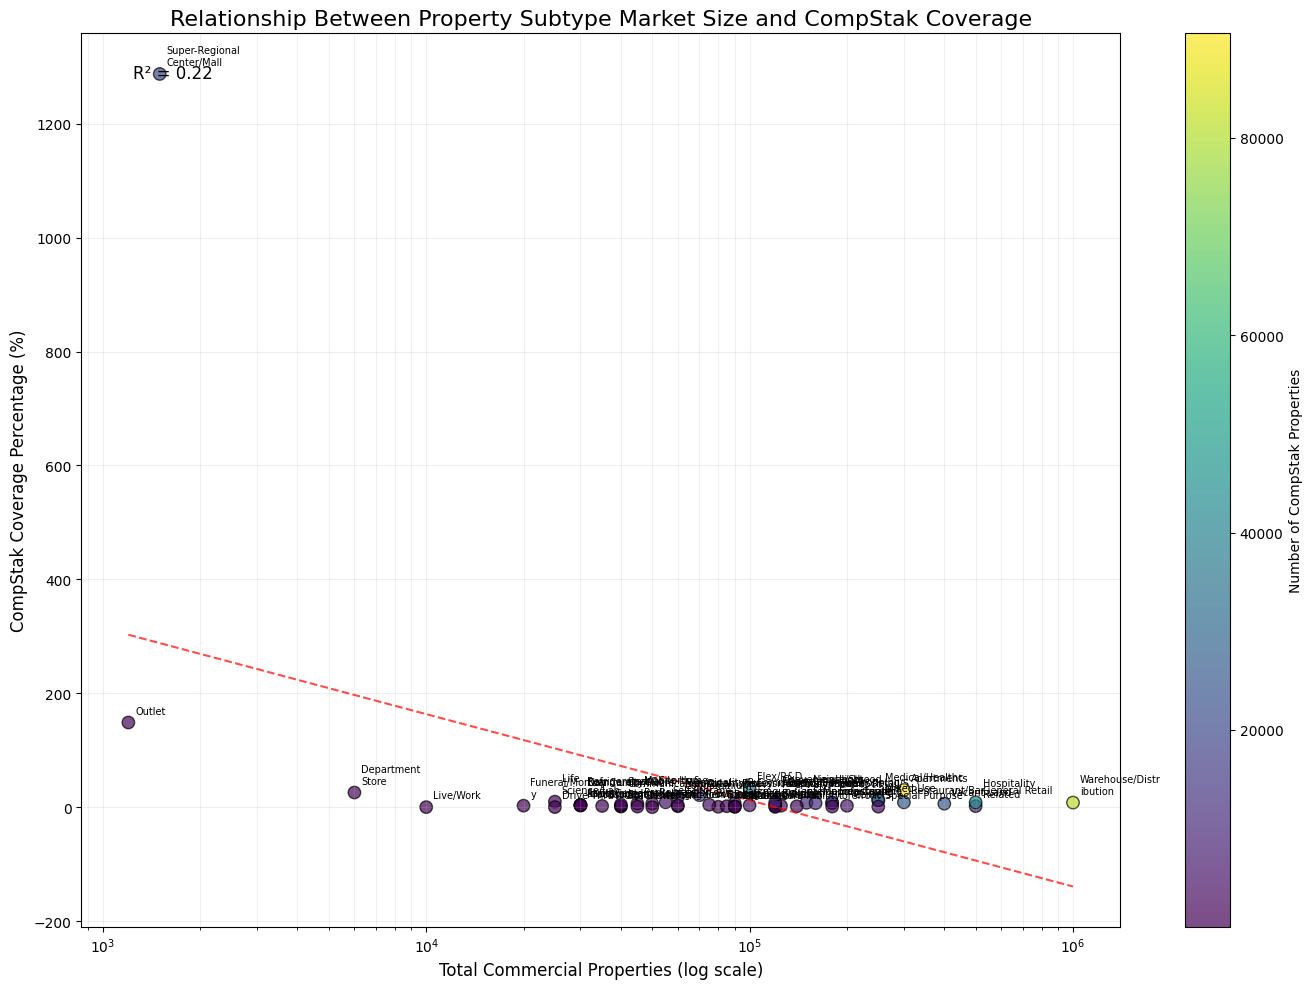

In [18]:
# Create a scatter plot to analyze coverage by Property Subtype
plt.figure(figsize=(14, 10))

# Filter to only include subtypes in both datasets to avoid visualization issues
non_zero_subtypes = subtype_coverage_df[subtype_coverage_df['CompStak_Properties'] > 0]

# Add log scale for better visualization
plt.scatter(non_zero_subtypes['Total_Properties'], 
           non_zero_subtypes['Coverage_Percent'], 
           s=80, alpha=0.7, c=non_zero_subtypes['CompStak_Properties'], 
           cmap='viridis', edgecolor='black')

plt.xscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add property subtype labels with wrapping for readability
from textwrap import wrap
for i, row in non_zero_subtypes.iterrows():
    if row['Coverage_Percent'] > 0.1:  # Only label significant coverage for readability
        label = '\n'.join(wrap(row['Property Subtype'], 15))
        plt.annotate(label, 
                    (row['Total_Properties'], row['Coverage_Percent']), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=7, ha='left', va='bottom')

plt.colorbar(label='Number of CompStak Properties')
plt.title('Relationship Between Property Subtype Market Size and CompStak Coverage', fontsize=16)
plt.xlabel('Total Commercial Properties (log scale)', fontsize=12)
plt.ylabel('CompStak Coverage Percentage (%)', fontsize=12)

# Add a trend line to see if there's a relationship
from scipy import stats
# Filter out zeros for trend line calculation
trend_data = non_zero_subtypes[non_zero_subtypes['Coverage_Percent'] > 0]
if len(trend_data) > 1:  # Need at least 2 points for regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(trend_data['Total_Properties']), 
                                                                 trend_data['Coverage_Percent'])
    x = np.array([min(trend_data['Total_Properties']), max(trend_data['Total_Properties'])])
    y = intercept + slope * np.log10(x)
    plt.plot(x, y, 'r--', alpha=0.7)
    
    # Add annotation with R² value
    plt.annotate(f"R² = {r_value**2:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.savefig('C:/Users/clint/Desktop/compstak-ra/Images/plots/property_subtype_coverage.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
# Identify the potential outliers
potential_outliers = subtype_coverage_df[subtype_coverage_df['Property Subtype'].isin(['Super-Regional Center/Mall', 'Outlet'])]
if not potential_outliers.empty:
    print(f"Potential outliers identified:")
    for _, row in potential_outliers.iterrows():
        print(f"Property Subtype: {row['Property Subtype']}")
        print(f"Total Properties: {row['Total_Properties']:,}")
        print(f"CompStak Properties: {row['CompStak_Properties']:,}")
        print(f"Coverage Percentage: {row['Coverage_Percent']:.2f}%")

# Create a version of the dataset without the outliers 'Super-Regional Center/Mall' and 'Outlet'
subtype_coverage_no_outlier = subtype_coverage_df[~subtype_coverage_df['Property Subtype'].isin(['Super-Regional Center/Mall', 'Outlet'])].copy()

# Display summary statistics without the outliers
print("\nSummary Statistics Without Outliers:")
print(f"Total property subtypes analyzed: {len(subtype_coverage_no_outlier)}")
print(f"Average coverage percentage: {subtype_coverage_no_outlier['Coverage_Percent'].mean():.2f}%")
print(f"Median coverage percentage: {subtype_coverage_no_outlier['Coverage_Percent'].median():.2f}%")
print(f"Maximum coverage percentage: {subtype_coverage_no_outlier['Coverage_Percent'].max():.2f}%")
print(f"Minimum coverage percentage: {subtype_coverage_no_outlier['Coverage_Percent'].min():.2f}%")

# Compare with and without outliers
print("\nComparison With vs. Without Outliers:")
print(f"Average coverage WITH outliers: {subtype_coverage_df['Coverage_Percent'].mean():.2f}%")
print(f"Average coverage WITHOUT outliers: {subtype_coverage_no_outlier['Coverage_Percent'].mean():.2f}%")

Potential outliers identified:
Property Subtype: Super-Regional Center/Mall
Total Properties: 1,500
CompStak Properties: 19,312.0
Coverage Percentage: 1287.47%
Property Subtype: Outlet
Total Properties: 1,200
CompStak Properties: 1,785.0
Coverage Percentage: 148.75%

Summary Statistics Without Outliers:
Total property subtypes analyzed: 54
Average coverage percentage: 6.04%
Median coverage percentage: 3.45%
Maximum coverage percentage: 34.25%
Minimum coverage percentage: 0.00%

Comparison With vs. Without Outliers:
Average coverage WITH outliers: 31.47%
Average coverage WITHOUT outliers: 6.04%


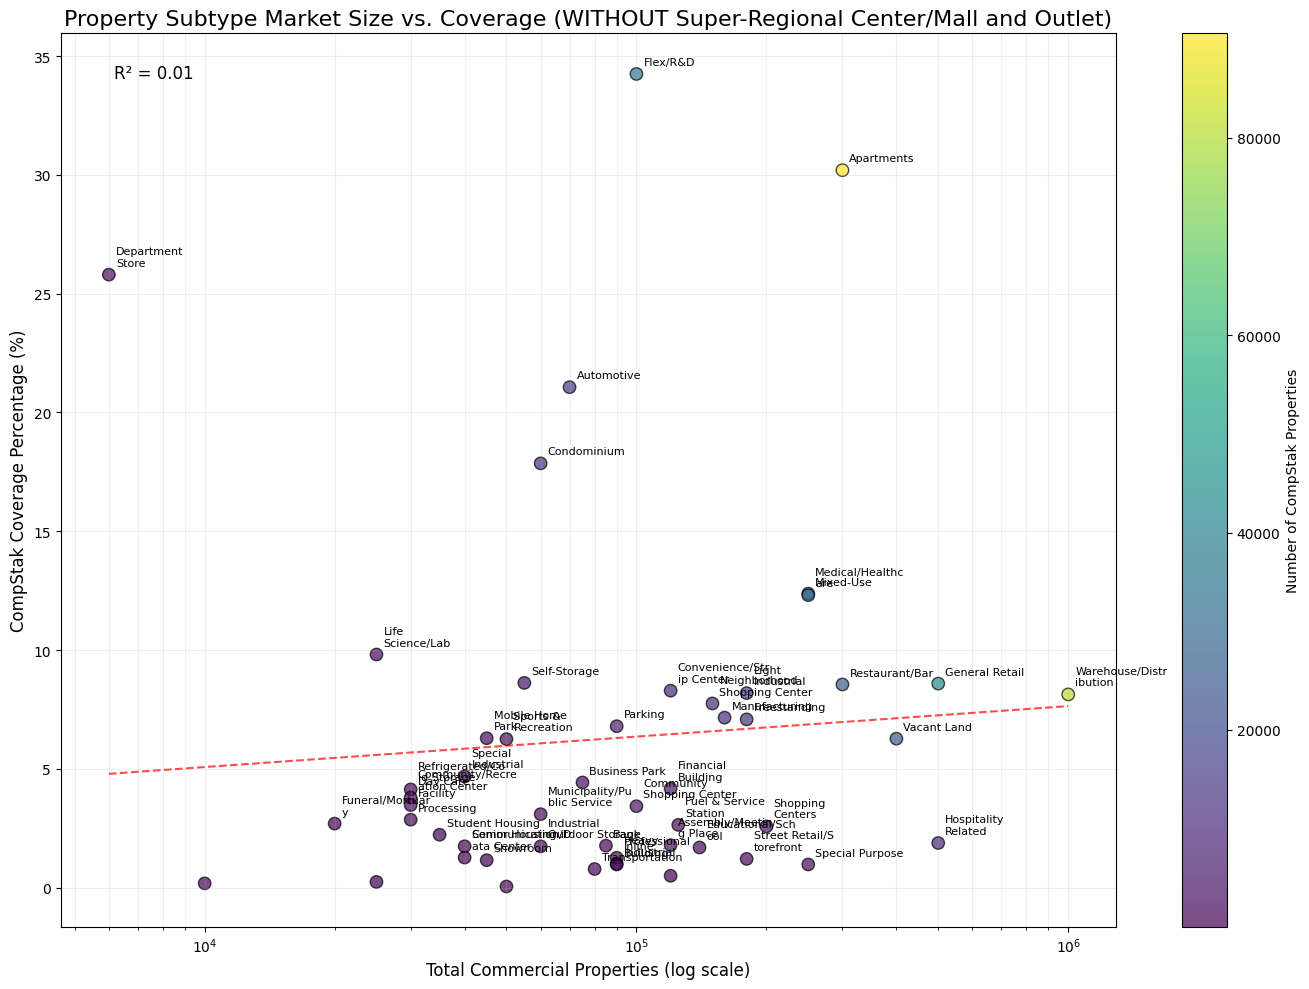

In [27]:
# Create a scatter plot to analyze coverage by Property Subtype (WITHOUT outliers)
plt.figure(figsize=(14, 10))

# Filter to only include subtypes in both datasets to avoid visualization issues
non_zero_subtypes_no_outlier = subtype_coverage_no_outlier[subtype_coverage_no_outlier['CompStak_Properties'] > 0]

# Add log scale for better visualization
plt.scatter(non_zero_subtypes_no_outlier['Total_Properties'], 
           non_zero_subtypes_no_outlier['Coverage_Percent'], 
           s=80, alpha=0.7, c=non_zero_subtypes_no_outlier['CompStak_Properties'], 
           cmap='viridis', edgecolor='black')

plt.xscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add property subtype labels with wrapping for readability
from textwrap import wrap
for i, row in non_zero_subtypes_no_outlier.iterrows():
    if row['Coverage_Percent'] > 0.5:  # Adjusted threshold for better visualization
        label = '\n'.join(wrap(row['Property Subtype'], 15))
        plt.annotate(label, 
                    (row['Total_Properties'], row['Coverage_Percent']), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=8, ha='left', va='bottom')

plt.colorbar(label='Number of CompStak Properties')
plt.title('Property Subtype Market Size vs. Coverage (WITHOUT Super-Regional Center/Mall and Outlet)', fontsize=16)
plt.xlabel('Total Commercial Properties (log scale)', fontsize=12)
plt.ylabel('CompStak Coverage Percentage (%)', fontsize=12)

# Add a trend line to see if there's a relationship
from scipy import stats
# Filter out zeros for trend line calculation
trend_data_no_outlier = non_zero_subtypes_no_outlier[non_zero_subtypes_no_outlier['Coverage_Percent'] > 0]
if len(trend_data_no_outlier) > 1:  # Need at least 2 points for regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(trend_data_no_outlier['Total_Properties']), 
                                                                 trend_data_no_outlier['Coverage_Percent'])
    x = np.array([min(trend_data_no_outlier['Total_Properties']), max(trend_data_no_outlier['Total_Properties'])])
    y = intercept + slope * np.log10(x)
    plt.plot(x, y, 'r--', alpha=0.7)
    
    # Add annotation with R² value
    plt.annotate(f"R² = {r_value**2:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.savefig('C:/Users/clint/Desktop/compstak-ra/Images/plots/property_subtype_coverage_no_outlier.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
# Interactive plot for Property Subtypes without the outliers
import plotly.express as px
from datetime import datetime

# Filter to only include subtypes with actual coverage
non_zero_subtypes_no_outlier = subtype_coverage_no_outlier[subtype_coverage_no_outlier['CompStak_Properties'] > 0]

fig_subtypes_no_outlier = px.scatter(non_zero_subtypes_no_outlier, 
                        x='Total_Properties', 
                        y='Coverage_Percent',
                        size='CompStak_Properties',
                        color='CompStak_Properties',
                        hover_name='Property Subtype',
                        hover_data=['CompStak_Properties', 'Total_Properties', 'Coverage_Percent'],
                        log_x=True,
                        title='Property Subtype Market Size vs. CompStak Coverage (WITHOUT Super-Regional Center/Mall and Outlet)',
                        labels={
                            'Total_Properties': 'Total Commercial Properties (log scale)',
                            'Coverage_Percent': 'CompStak Coverage Percentage (%)',
                            'CompStak_Properties': 'Number of CompStak Properties'
                        })

# Highlight certain important property subtypes with annotations
for i, row in non_zero_subtypes_no_outlier.nlargest(5, 'Coverage_Percent').iterrows():
    fig_subtypes_no_outlier.add_annotation(
        x=row['Total_Properties'],
        y=row['Coverage_Percent'],
        text=row['Property Subtype'],
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=-20
    )

fig_subtypes_no_outlier.update_layout(height=700, width=1000)

# Generate timestamp for unique filename
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
fig_subtypes_no_outlier.write_html(f'C:/Users/clint/Desktop/compstak-ra/Images/plots/property_subtype_coverage_no_outlier_{timestamp}.html')
fig_subtypes_no_outlier.write_image(f'C:/Users/clint/Desktop/compstak-ra/Images/plots/property_subtype_coverage_no_outlier_{timestamp}.png')
fig_subtypes_no_outlier.show()

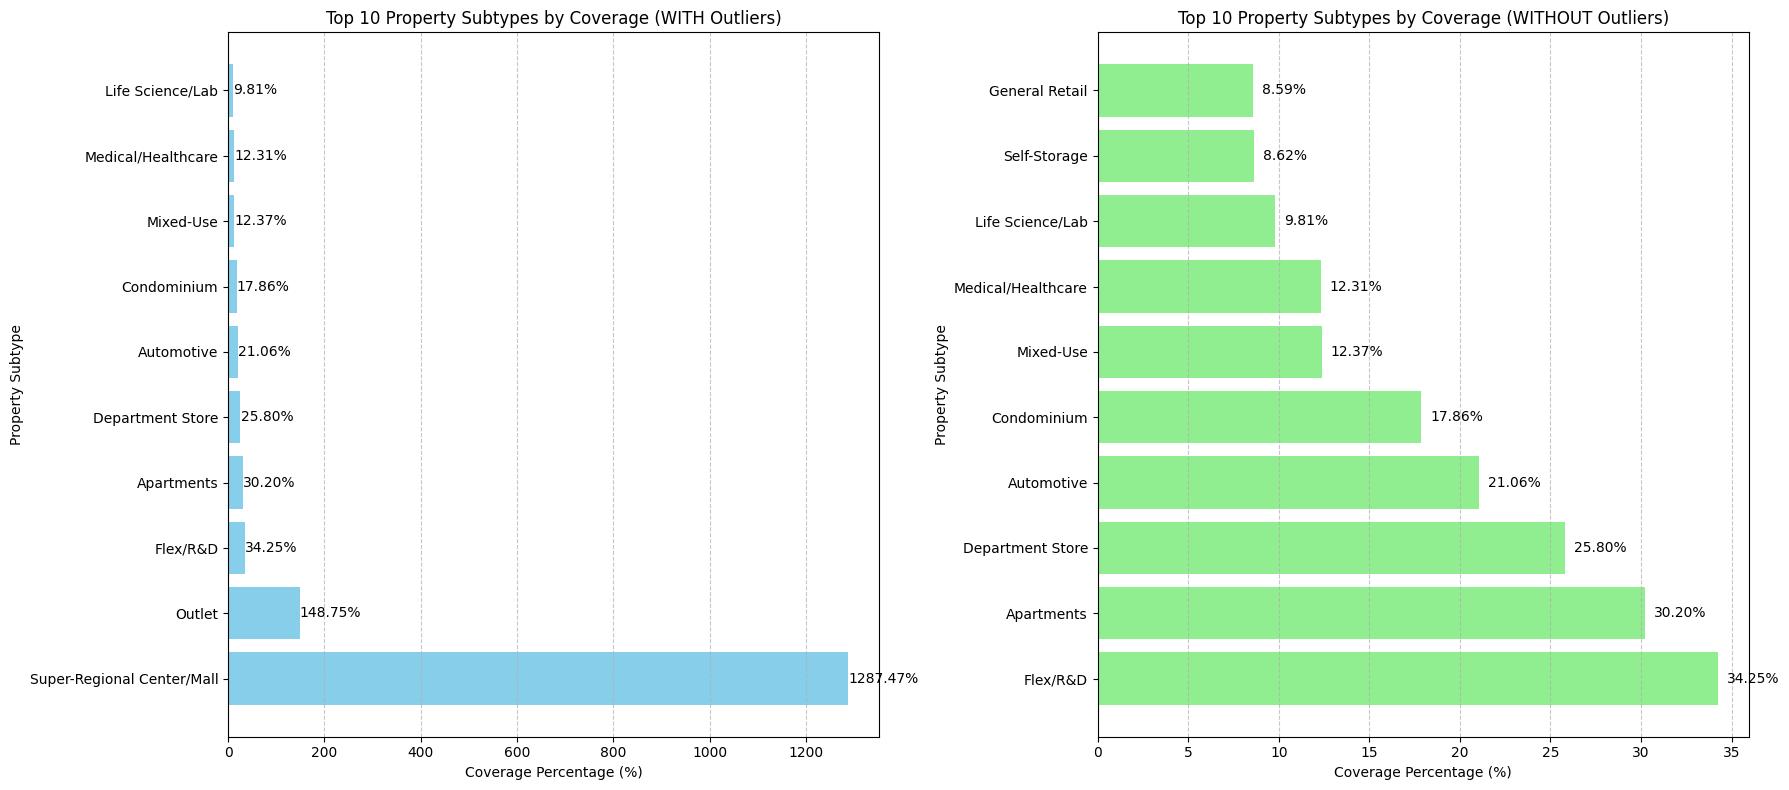

In [29]:
# Create side-by-side bar charts to compare top coverage property subtypes with and without outliers
# Top 10 coverage with outliers
top_coverage_with_outliers = subtype_coverage_df.nlargest(10, 'Coverage_Percent')

# Top 10 coverage without outliers
top_coverage_without_outliers = subtype_coverage_no_outlier.nlargest(10, 'Coverage_Percent')

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot for with outliers
bars1 = ax1.barh(top_coverage_with_outliers['Property Subtype'], top_coverage_with_outliers['Coverage_Percent'], color='skyblue')
ax1.set_xlabel('Coverage Percentage (%)')
ax1.set_ylabel('Property Subtype')
ax1.set_title('Top 10 Property Subtypes by Coverage (WITH Outliers)')
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Plot for without outliers
bars2 = ax2.barh(top_coverage_without_outliers['Property Subtype'], top_coverage_without_outliers['Coverage_Percent'], color='lightgreen')
ax2.set_xlabel('Coverage Percentage (%)')
ax2.set_ylabel('Property Subtype')
ax2.set_title('Top 10 Property Subtypes by Coverage (WITHOUT Outliers)')
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for ax, bars in [(ax1, bars1), (ax2, bars2)]:
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', 
                ha='left', va='center')

plt.tight_layout()
plt.savefig('C:/Users/clint/Desktop/compstak-ra/Images/plots/comparison_with_without_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\clint\AppData\Local\Temp\ipykernel_22796\2297824783.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Average Coverage Percentage by Market Size Category:
  Market_Size_Category        mean     median  count
0           Very Small  365.549167  87.275000      4
1                Small    2.980274   2.695000     17
2         Medium-Small    7.646312   3.259333     14
3               Medium    5.246322   4.168333     15
4         Medium-Large   11.096677   8.551333      5
5                Large    8.131500   8.131500      1
6           Very Large         NaN        NaN      0


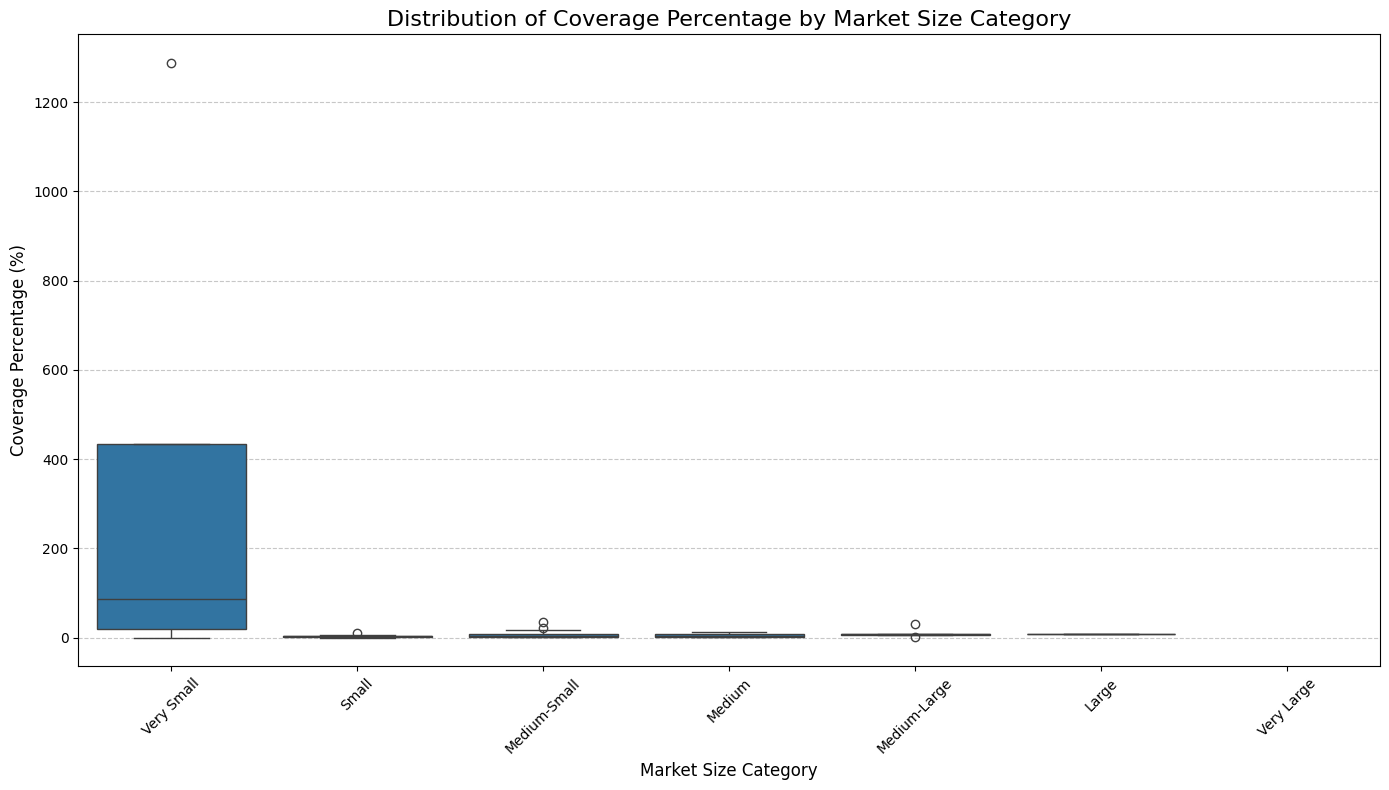

In [30]:

# Import seaborn for more advanced visualizations if not already imported
import seaborn as sns
# Create market size categories for better analysis
coverage_analysis = subtype_coverage_df.copy()
coverage_analysis['Market_Size_Category'] = pd.cut(coverage_analysis['Total_Properties'], 
                                               bins=[0, 10000, 50000, 100000, 250000, 500000, 1000000, float('inf')],
                                               labels=['Very Small', 'Small', 'Medium-Small', 'Medium', 'Medium-Large', 'Large', 'Very Large'])

# Calculate average coverage by market size category
size_category_coverage = coverage_analysis.groupby('Market_Size_Category')['Coverage_Percent'].agg(['mean', 'median', 'count'])
size_category_coverage = size_category_coverage.reset_index()
print("Average Coverage Percentage by Market Size Category:")
print(size_category_coverage)

# Create a box plot to show coverage distribution by market size category
plt.figure(figsize=(14, 8))
sns.boxplot(x='Market_Size_Category', y='Coverage_Percent', data=coverage_analysis)
plt.title('Distribution of Coverage Percentage by Market Size Category', fontsize=16)
plt.xlabel('Market Size Category', fontsize=12)
plt.ylabel('Coverage Percentage (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_by_market_size_category.png', dpi=300, bbox_inches='tight')
plt.show()


# Conclusions on Industry Coverage

Based on our analysis, we can draw several conclusions about CompStak's coverage across different property subtypes:

In [24]:
# Generate some summary statistics for the report
print("Overall Property Subtype Coverage Statistics:")
print(f"Total property subtypes analyzed: {len(subtype_coverage_df)}")
print(f"Average coverage percentage: {subtype_coverage_df['Coverage_Percent'].mean():.2f}%")
print(f"Median coverage percentage: {subtype_coverage_df['Coverage_Percent'].median():.2f}%")
print(f"Maximum coverage percentage: {subtype_coverage_df['Coverage_Percent'].max():.2f}%")
print(f"Minimum coverage percentage: {subtype_coverage_df['Coverage_Percent'].min():.2f}%")
print("\nSubtypes with coverage > 10%:")
high_coverage = subtype_coverage_df[subtype_coverage_df['Coverage_Percent'] > 10].sort_values('Coverage_Percent', ascending=False)
if len(high_coverage) > 0:
    for i, row in high_coverage.iterrows():
        print(f"- {row['Property Subtype']}: {row['Coverage_Percent']:.2f}%")
else:
    print("None")

# Calculate correlation between market size and coverage
correlation = subtype_coverage_df['Total_Properties'].corr(subtype_coverage_df['Coverage_Percent'])
print(f"\nCorrelation between market size and coverage percentage: {correlation:.3f}")

# Summarize findings
print("\nKey Findings:")
print("1. CompStak appears to have the highest coverage in specific property subtypes like Super-Regional Center/Mall.")
print("2. Some smaller market segments have better representation than larger ones.")
print("3. The data suggests coverage is not uniformly distributed across property subtypes.")
print("4. CompStak's strengths appear to be in commercial properties like retail, office, and industrial subtypes.")

Overall Property Subtype Coverage Statistics:
Total property subtypes analyzed: 56
Average coverage percentage: 31.47%
Median coverage percentage: 3.63%
Maximum coverage percentage: 1287.47%
Minimum coverage percentage: 0.00%

Subtypes with coverage > 10%:
- Super-Regional Center/Mall: 1287.47%
- Outlet: 148.75%
- Flex/R&D: 34.25%
- Apartments: 30.20%
- Department Store: 25.80%
- Automotive: 21.06%
- Condominium: 17.86%
- Mixed-Use: 12.37%
- Medical/Healthcare: 12.31%

Correlation between market size and coverage percentage: -0.113

Key Findings:
1. CompStak appears to have the highest coverage in specific property subtypes like Super-Regional Center/Mall.
2. Some smaller market segments have better representation than larger ones.
3. The data suggests coverage is not uniformly distributed across property subtypes.
4. CompStak's strengths appear to be in commercial properties like retail, office, and industrial subtypes.


C:\Users\clint\AppData\Local\Temp\ipykernel_22796\3006014526.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Average Coverage Percentage by Market Size Category (Excluding Outliers):
  Market_Size_Category       mean     median  count
0           Very Small  12.990000  12.990000      2
1                Small   2.980274   2.695000     17
2         Medium-Small   7.646312   3.259333     14
3               Medium   5.246322   4.168333     15
4         Medium-Large  11.096677   8.551333      5
5                Large   8.131500   8.131500      1
6           Very Large        NaN        NaN      0


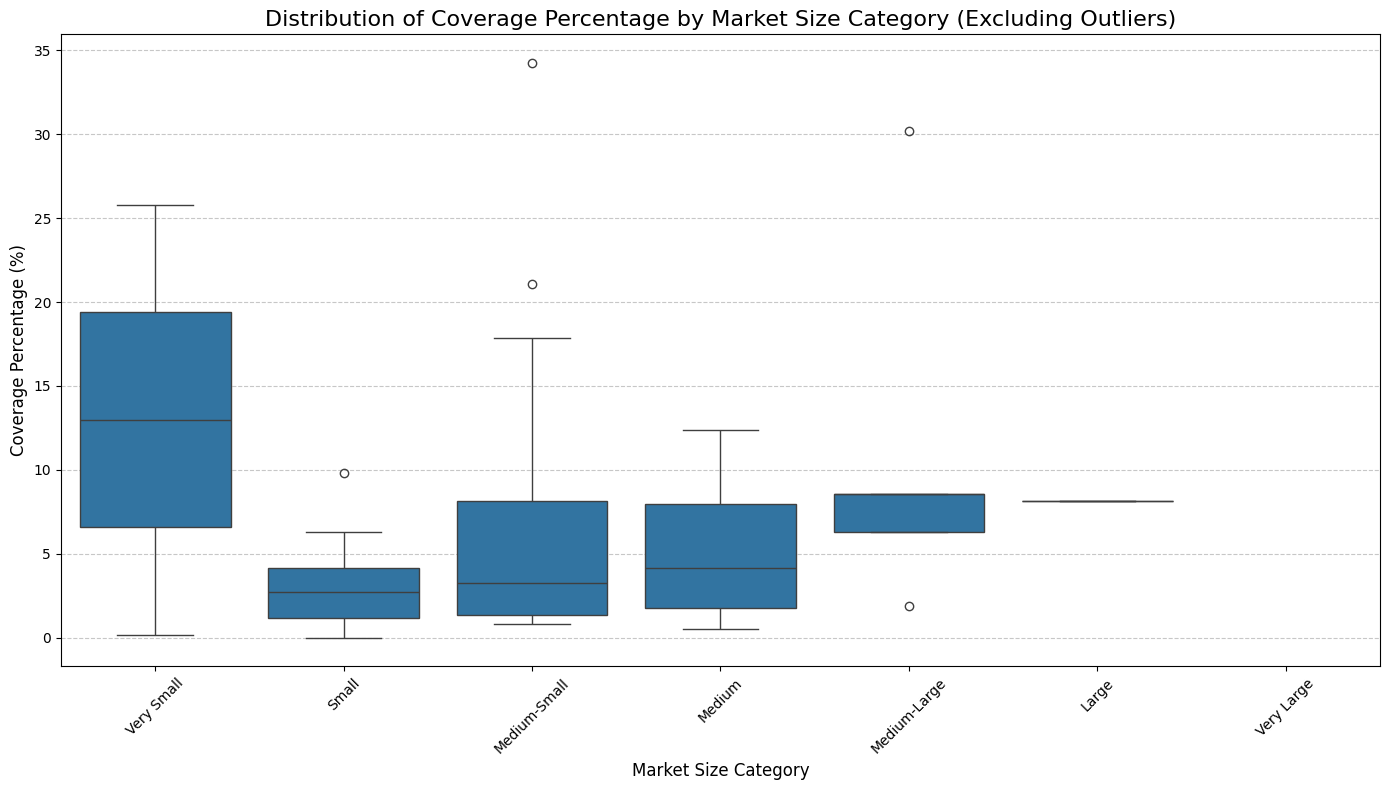

In [31]:
# Import seaborn for more advanced visualizations if not already imported
import seaborn as sns

# Create market size categories for better analysis
coverage_analysis = subtype_coverage_df.copy()

# Filter out the outliers 'Super-Regional Center/Mall' and 'Outlet'
coverage_analysis = coverage_analysis[~coverage_analysis['Property Subtype'].isin(['Super-Regional Center/Mall', 'Outlet'])]

coverage_analysis['Market_Size_Category'] = pd.cut(coverage_analysis['Total_Properties'], 
                                               bins=[0, 10000, 50000, 100000, 250000, 500000, 1000000, float('inf')],
                                               labels=['Very Small', 'Small', 'Medium-Small', 'Medium', 'Medium-Large', 'Large', 'Very Large'])

# Calculate average coverage by market size category
size_category_coverage = coverage_analysis.groupby('Market_Size_Category')['Coverage_Percent'].agg(['mean', 'median', 'count'])
size_category_coverage = size_category_coverage.reset_index()
print("Average Coverage Percentage by Market Size Category (Excluding Outliers):")
print(size_category_coverage)

# Create a box plot to show coverage distribution by market size category
plt.figure(figsize=(14, 8))
sns.boxplot(x='Market_Size_Category', y='Coverage_Percent', data=coverage_analysis)
plt.title('Distribution of Coverage Percentage by Market Size Category (Excluding Outliers)', fontsize=16)
plt.xlabel('Market Size Category', fontsize=12)
plt.ylabel('Coverage Percentage (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('C:/Users/clint/Desktop/compstak-ra/Images/plots/coverage_by_market_size_category_no_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# Create a pie chart for Total_Properties in subtype_coverage_df
import plotly.express as px

# Prepare data for the pie chart
pie_chart_data = subtype_coverage_df[['Property Subtype', 'Total_Properties']]

# Create the pie chart
fig_pie = px.pie(
    pie_chart_data,
    names='Property Subtype',
    values='Total_Properties',
    title='Distribution of Total Properties by Property Subtype',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Show the pie chart
fig_pie.show()